## Import libraries and read the data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv(r"C:\Users\Bao Viet\Desktop\FPT University\SUMMER 20204\MAS291\project\restaurant_data.csv")
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,8368.0,4.008258,0.581474,3.000000,3.500000,4.000000,4.500000,5.000000e+00
Seating Capacity,8368.0,60.212835,17.399488,30.000000,45.000000,60.000000,75.000000,9.000000e+01
Average Meal Price,8368.0,47.896659,14.336767,25.000000,35.490000,45.535000,60.300000,7.600000e+01
Marketing Budget,8368.0,3218.254900,1824.896053,604.000000,1889.000000,2846.500000,4008.500000,9.978000e+03
Social Media Followers,8368.0,36190.621773,18630.153330,5277.000000,22592.500000,32518.500000,44566.250000,1.037770e+05
Chef Experience Years,8368.0,10.051984,5.516606,1.000000,5.000000,10.000000,15.000000,1.900000e+01
Number of Reviews,8368.0,523.010397,277.215127,50.000000,277.000000,528.000000,764.250000,9.990000e+02
Avg Review Length,8368.0,174.769974,71.998060,50.011717,113.311102,173.910079,237.406885,2.999849e+02
Ambience Score,8368.0,5.521283,2.575442,1.000000,3.300000,5.500000,7.800000,1.000000e+01
Service Quality Score,8368.0,5.508772,2.586552,1.000000,3.200000,5.600000,7.800000,1.000000e+01


In [83]:
fig = px.histogram(df, x='Revenue', nbins=30, marginal='box', 
                   title='Revenue Frequency Histogram',
                   labels={'revenue': 'Revenue'})

fig.add_vline(x=df['Revenue'].mean(), line_dash="dash", line_color="red", 
              annotation_text="Mean", annotation_position="top right")

fig.update_layout(showlegend=False)

fig.show()

## 1. Test a hypothesis and construct a confidence interval for the mean of a population.
**Person In Chare: Ngoc Y Cao**

In [84]:
np.random.seed(42)
df_revenue = df[['Revenue']]
data_sample = df_revenue.sample(100, ignore_index=True)
X_population = float(df_revenue.mean())
sigma_population = df_revenue.std()
X_sample = data_sample.mean()
print(data_sample.info())
Z_score = float((X_sample - X_population) / (sigma_population / 50**(1/2)))
print(f"Z-score: {Z_score}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes
None
Z-score: -0.20107470418943027


<Axes: ylabel='Count'>

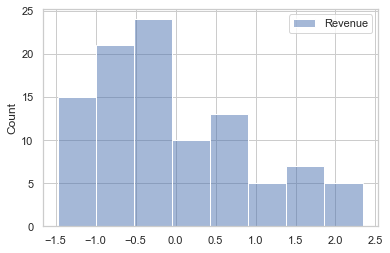

In [85]:
alpha = 0.05
Standardized_data_sample = (data_sample - X_population) / sigma_population
sns.histplot(Standardized_data_sample)

In [86]:
from scipy.stats import norm
alpha = 0.05
critical_value_1 = norm.ppf(alpha / 2)
critical_value_2 = norm.ppf(1 - alpha / 2)
print(critical_value_1, critical_value_2)

-1.9599639845400545 1.959963984540054


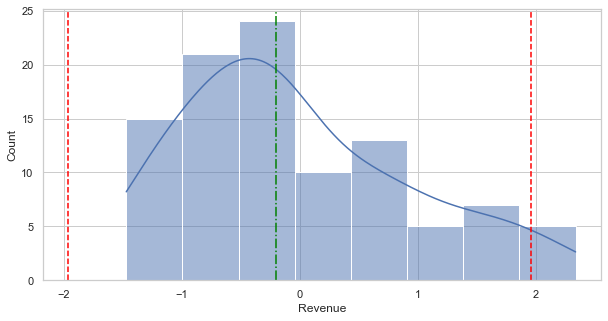

In [87]:
fig, hist = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=Standardized_data_sample, x='Revenue', ax=hist, kde=True)
hist.axvline(critical_value_1, color='red', linestyle='--')
hist.axvline(critical_value_2, color='red', linestyle='--')
hist.axvline(Z_score, color='green', linestyle='dashdot')

## 2. Test a hypothesis and construct a confidence interval for the proportion of a population
**Person In Charge: Quoc Nhuc Nguyen**


Set Hypotheses

- H0: The proportion of restaurants with ratings over 4.0 is 50% (p = 0.5)
- H1: The proportion of restaurants with ratings over 4.0 is not 50% (p ≠ 0.5)

In [88]:
data = pd.read_csv('./data/restaurant_data.csv')

## Create a Boolean Column for Restaurants with Ratings over 4.0
data['High_Rating'] = data['Rating'] > 4.0
print(data[['Rating', 'High_Rating']])

      Rating  High_Rating
0        4.0        False
1        3.2        False
2        4.7         True
3        4.4         True
4        4.9         True
...      ...          ...
8363     3.4        False
8364     3.7        False
8365     4.7         True
8366     3.1        False
8367     4.0        False

[8368 rows x 2 columns]


In [89]:
## Hypothesis Testing: The Proportion of Restaurants with Ratings over 4.0 is 50%
p0 = 0.5  # hypothesized proportion
p_hat = data['High_Rating'].mean()  # sample proportion
n = len(data)  # sample size

## Calculate z Value
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

## Calculate p-value

p_value = 2 * (1 - stats.norm.cdf(abs(z)))

## Calculate 95% Confidence Interval for the Proportion

conf_int = stats.norm.interval(0.95, loc=p_hat, scale=np.sqrt(p_hat * (1 - p_hat) / n))
# Print formula and results
print(f"Formula for z-value: z = (p̂ - p0) / sqrt(p0 * (1 - p0) / n)")
print(f"Formula for p-value: p_value = 2 * (1 - stats.norm.cdf(abs(z)))")
print(f"Formula for 95% confidence interval: CI = stats.norm.interval(0.95, loc=p̂, scale=sqrt(p̂ * (1 - p̂) / n))")

print("\nResults:")
print(f"Sample proportion (p̂): {p_hat:.4f}")
print(f"Z-value: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"95% Confidence interval: {conf_int}")

Formula for z-value: z = (p̂ - p0) / sqrt(p0 * (1 - p0) / n)
Formula for p-value: p_value = 2 * (1 - stats.norm.cdf(abs(z)))
Formula for 95% confidence interval: CI = stats.norm.interval(0.95, loc=p̂, scale=sqrt(p̂ * (1 - p̂) / n))

Results:
Sample proportion (p̂): 0.4803
Z-value: -3.6075
P-value: 0.0003
95% Confidence interval: (0.4695774551865254, 0.49098659835075953)


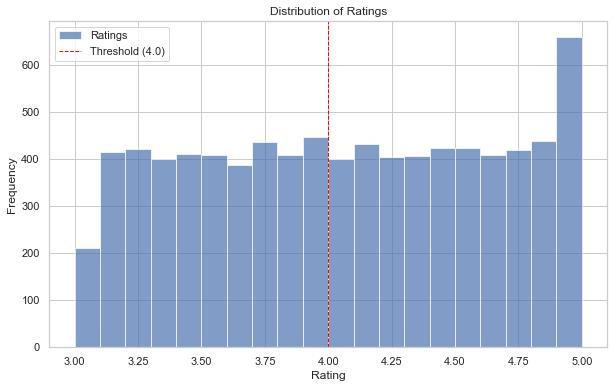

In [90]:
## Illustrate Results with a Plot

plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=20, alpha=0.7, label='Ratings')
plt.axvline(4.0, color='red', linestyle='dashed', linewidth=1, label='Threshold (4.0)')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [91]:
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis H0.")
else:
    print("Conclusion: Do not reject the null hypothesis H0.")

Conclusion: Reject the null hypothesis H0.


## 3. Test a hypothesis and construct a confidence interval for the difference in means of two populations.
**Person In Charge: Xuan Bao Viet Tran**

***Hypothesis***

State the problem : Is there any difference in the average meal price between Downtown and Rural locations

Null Hypothesis ($H_0$): There is no difference in the average meal price between Downtown and Rural locations.

$$
H_0: \mu_1 = \mu_2
$$

Alternative Hypothesis ($H_1$): There is a difference in the average meal price between Downtown and Rural locations.

$$
H_1: \mu_1 \neq \mu_2
$$


In [92]:
df = pd.read_csv('./data/restaurant_data.csv')

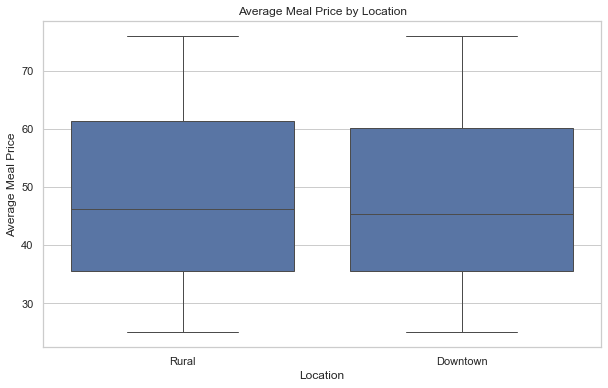

Location
Downtown    47.688898
Rural       48.637013
Name: Average Meal Price, dtype: float64


In [93]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Filter data to include only Downtown and Rural locations
filtered_data = df[df['Location'].isin(['Downtown', 'Rural'])]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Average Meal Price', data=filtered_data)
plt.title('Average Meal Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Meal Price')
plt.show()

# Calculate the average meal prices for Downtown and Rural locations
average_prices = df.groupby('Location')['Average Meal Price'].mean().loc[['Downtown', 'Rural']]
print(average_prices)

#### Calculate the z-statistic


$
z= \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} = \frac{47.69 - 48.64}{\sqrt{\frac{14.27^2}{2821} + \frac{14.47^2}{2762}}} = -2.465
$

In [5]:
# Separate the data into two groups based on the location
downtown_prices = df[df['Location'] == 'Downtown']['Average Meal Price']
rural_prices = df[df['Location'] == 'Rural']['Average Meal Price']

# Calculate the means
mean_downtown = np.mean(downtown_prices)
mean_rural = np.mean(rural_prices)

# Calculate the variances
var_downtown = np.var(downtown_prices, ddof=1)
var_rural = np.var(rural_prices, ddof=1)

# Calculate the sample sizes
n_downtown = len(downtown_prices)
n_rural = len(rural_prices)

# Calculate the z-statistic
z_stat = (mean_downtown - mean_rural) / np.sqrt((var_downtown/n_downtown + var_rural/n_rural))

print(f'The z-statistic is {z_stat}')


The z-statistic is -2.4647920805760277


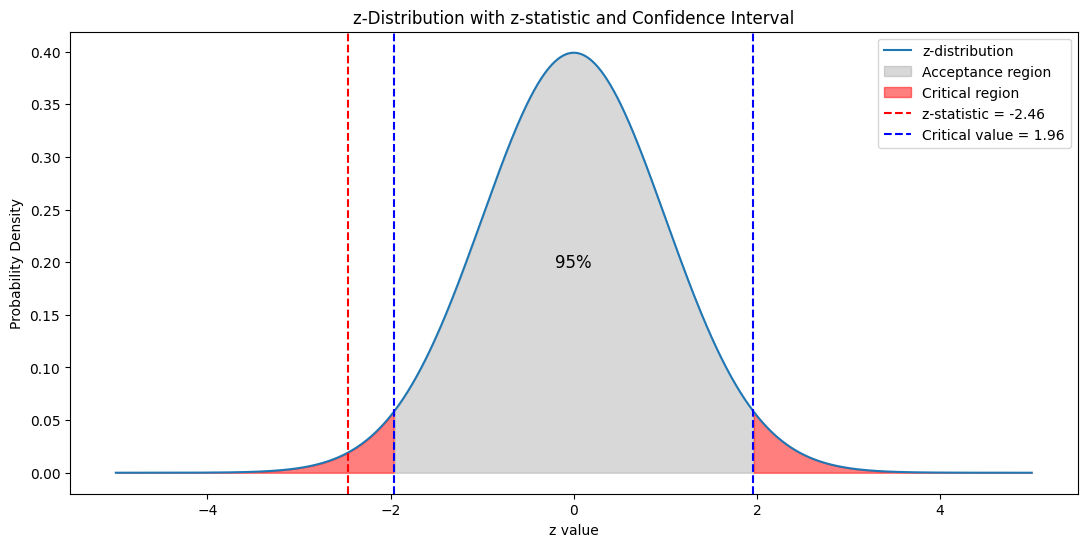

In [6]:
alpha = 0.05  # significance level for a 95% confidence interval

# Create an array of x values for the z-distribution
x = np.linspace(-5, 5, 1000)

# Calculate the z-distribution (standard normal distribution)
y = stats.norm.pdf(x)

# Critical z-value for a two-tailed test at 95% confidence level
critical_value = stats.norm.ppf(1 - alpha/2)

# Plot the z-distribution
plt.figure(figsize=(13, 6))
plt.plot(x, y, label='z-distribution')

# Fill the acceptance region (within the critical values)
plt.fill_between(x, y, where=(x <= critical_value) & (x >= -critical_value), color='grey', alpha=0.3, label='Acceptance region')

# Add text for the 95% acceptance region
plt.text(0 * critical_value, max(y)/2, '95%', fontsize=12, verticalalignment='center', horizontalalignment='center', color='black')

plt.fill_between(x, y, where=(x <= -critical_value), color='red', alpha=0.5)
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label='Critical region')
plt.axvline(x=z_stat, color='red', linestyle='--', label='z-statistic = {:.2f}'.format(z_stat))
#plt.axvline(x=-t_stat, color='red', linestyle='--')

# Add critical value lines
plt.axvline(x=critical_value, color='blue', linestyle='--', label='Critical value = {:.2f}'.format(critical_value))
plt.axvline(x=-critical_value, color='blue', linestyle='--')

plt.title('z-Distribution with z-statistic and Confidence Interval')
plt.xlabel('z value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Because the z-statistic is -2.464 not in the acceptance region of 95% confidence interval which is the critical value of -1.96 to 1.96 so reject H0

### Construct a confidence interval for the difference in means of two populations.

$
\text{Confidence Interval} =\bar{X}_1 - \bar{X}_2 \pm z_{\alpha/2} \times\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}} =-0.95 \pm 1.96 \times\ \sqrt{\frac{14.27^2}{2821} + \frac{14.47^2}{2762}} 
$

$
\text{Confidence Interval} = [-1.702, -0.194]
$

In [7]:
# Calculate the mean difference
mean_difference = mean_downtown - mean_rural

# Calculate the standard error
SE = np.sqrt((var_downtown / n_downtown) + (var_rural / n_rural))

# Calculate the margin of error
margin_of_error = critical_value * SE

# Calculate the confidence interval
confidence_interval = (mean_difference - margin_of_error, mean_difference + margin_of_error)

print('The confidence interval is:', confidence_interval)

The confidence interval is: (-1.7020420316617622, -0.19418892828716106)


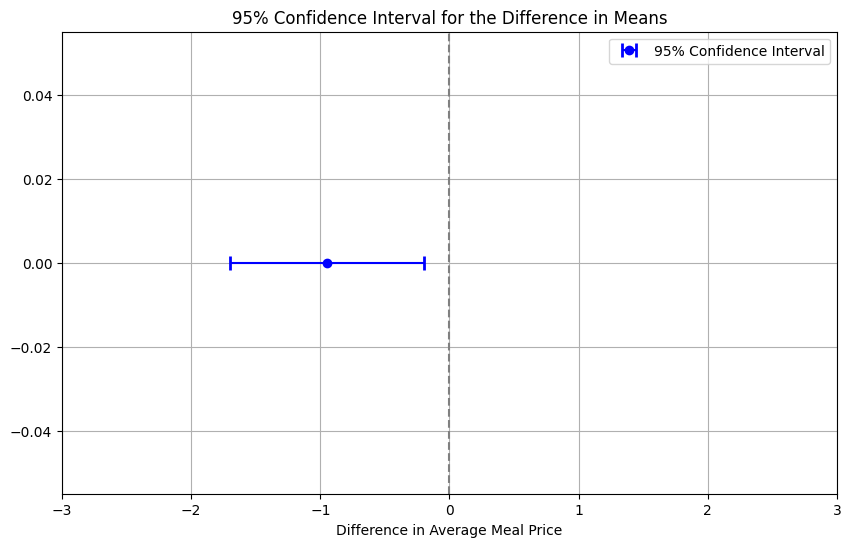

In [8]:
# Plot the confidence interval in a horizontal format with a more zoomed-out view
plt.figure(figsize=(10, 6))
plt.errorbar(y=0, x=mean_difference, xerr=[[mean_difference - confidence_interval[0]], [confidence_interval[1] - mean_difference]],
             fmt='o', color='b', capsize=5, capthick=2, label='95% Confidence Interval')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Difference in Average Meal Price')
plt.title('95% Confidence Interval for the Difference in Means')
plt.legend()
plt.grid(True)
plt.xlim(-3, 3)  # Adjust the x-limits to zoom out
plt.show()

## 4. Test a hypothesis and construct a confidence interval for the difference in proportions of two populations.
**Person In Charge: Hoang Viet Nguyen**


- Statement of the problem: Test the hypothesis and build a confidence interval for the difference in the proportion of restaurants with **revenue over 500 000** between the sample of restaurants with parking and the sample without parking.

Null Hypothesis: $H_0: p_1 = p_2$

Alternative Hypothesis: $H_1: p_1 \neq p_2$


In [99]:
df = pd.read_csv('./data/restaurant_data.csv')

In [100]:
#Test a hypothesis and construct a confidence interval for the difference in proportions of two populations.
Parking = df[df['Parking Availability'] == 'Yes']['Revenue']
NoParking = df[df['Parking Availability'] == 'No']['Revenue']

n1 = len(Parking)
n2 = len(NoParking)
print("Number of Parking Availability: \nn1 =", n1)
print("Number of No Parking Availability: \nn2 =", n2)

Number of Parking Availability: 
n1 = 4189
Number of No Parking Availability: 
n2 = 4179


In [101]:
# Count the revenue > 500000
count_Parking = Parking[Parking > 500000].count()
count_NoParking = NoParking[NoParking > 500000].count()
print("Number of Parking Availability revenue > 500000: \nx1 =", count_Parking)
print("Number of No Parking Availability revenue > 500000: \nx2 =", count_NoParking)

Number of Parking Availability revenue > 500000: 
x1 = 2845
Number of No Parking Availability revenue > 500000: 
x2 = 2801


In [102]:
p1_hat = count_Parking / len(Parking)
p2_hat = count_NoParking / len(NoParking)
p_hat = (count_Parking + count_NoParking) / (len(Parking) + len(NoParking))
print("Sample proportion of Parking Availability p^1: ", p1_hat)
print("Sample proportion of No Parking Availability p^2: ", p2_hat)
print("Difference in sample proportions: ", p1_hat - p2_hat)
print("Pooled proportion: ", p_hat)

Sample proportion of Parking Availability p^1:  0.6791597039866316
Sample proportion of No Parking Availability p^2:  0.6702560421153386
Difference in sample proportions:  0.00890366187129299
Pooled proportion:  0.6747131931166348


In [103]:
z0 = (p1_hat - p2_hat) / (p_hat * (1 - p_hat) * (1 / n1 + 1 / n2)) ** 0.5 
print("Test statistic z0: ", z0)

Test statistic z0:  0.869273345134384


In [104]:
alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha / 2)
print("Critical value z_alpha: ", z_alpha)

if abs(z0) > z_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
    print("So we can not say that the proportion of revenue > 500000 is different between Parking Availability and No Parking Availability")

Critical value z_alpha:  1.959963984540054
Fail to reject the null hypothesis
So we can not say that the proportion of revenue > 500000 is different between Parking Availability and No Parking Availability


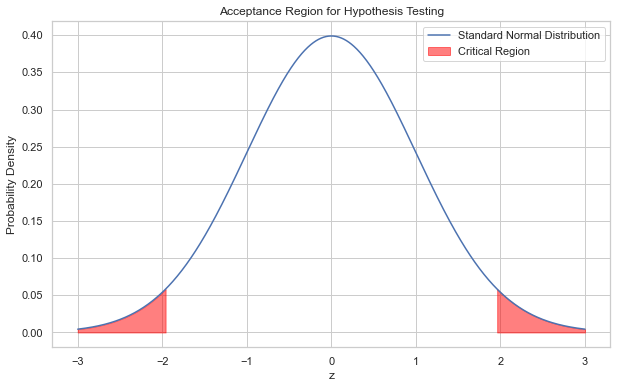

In [105]:
# Plot the acceptance region for hypothesis testing
plt.figure(figsize=(10, 6))
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, y, where=(x <= -z_alpha), color='red', alpha=0.5, label='Critical Region')
plt.fill_between(x, y, where=(x >= z_alpha), color='red', alpha=0.5)
plt.title('Acceptance Region for Hypothesis Testing')
plt.xlabel('z')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

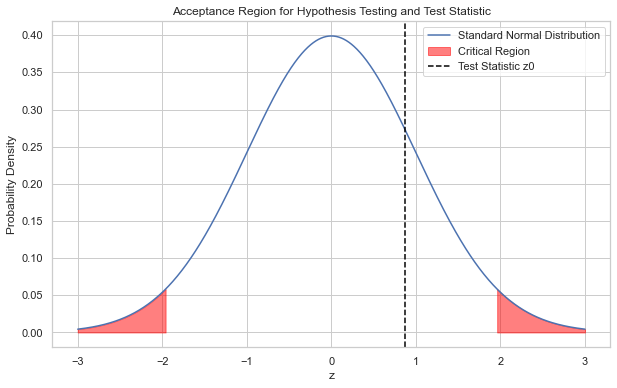

In [106]:
# Plot the normal distribution and the critical region
plt.figure(figsize=(10, 6))
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Standard Normal Distribution')
plt.fill_between(x, y, where=(x <= -z_alpha), color='red', alpha=0.5, label='Critical Region')
plt.fill_between(x, y, where=(x >= z_alpha), color='red', alpha=0.5)
plt.axvline(z0, color='black', linestyle='--', label='Test Statistic z0')
plt.title('Acceptance Region for Hypothesis Testing and Test Statistic')
plt.xlabel('z')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
# Construct a confidence interval for the difference in proportions
CI = (p1_hat - p2_hat) + np.array([-1, 1]) * z_alpha * (p_hat * (1 - p_hat) * (1 / n1 + 1 / n2)) ** 0.5
print("95% confidence interval for the difference in proportions: ", CI)

95% confidence interval for the difference in proportions:  [-0.01117156  0.02897889]


## 5 .Regression analysis. In this requirement, you are expected to complete the following steps:
**Person In Charge: Minh Dat Vo Nguyen**

In [108]:
data = pd.read_csv('./data/restaurant_data.csv')

In [109]:
revenue_mean_by_location = data.groupby('Location')['Revenue'].mean().reset_index()
revenue_mean_by_location.columns = ['Location', 'Mean Revenue']
revenue_mean_by_location

,Location,Mean Revenue
0,Downtown,866582.166707
1,Rural,450158.131676
2,Suburban,647049.702747


In [110]:
downtown_data = data[(data['Location'] == 'Downtown')&(data['Cuisine'] == 'Japanese')]
dowtown_jp_seat_revenue = downtown_data.groupby('Seating Capacity')['Revenue'].mean().reset_index()
dowtown_jp_seat_revenue.columns = ['Seating Capacity', 'Mean Revenue']
dowtown_jp_seat_revenue

,Seating Capacity,Mean Revenue
0,70,1.100440e+06
1,71,1.135511e+06
2,72,1.140341e+06
3,73,1.158906e+06
4,74,1.152597e+06
5,75,1.195350e+06
6,76,1.220667e+06
7,77,1.211071e+06
8,78,1.238156e+06
9,79,1.252175e+06


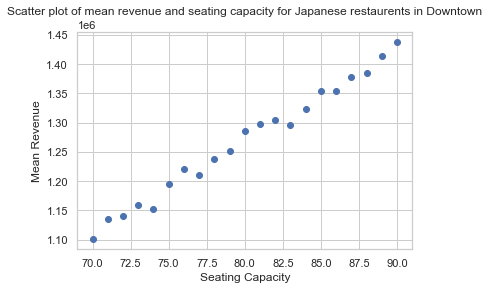

In [111]:
X = dowtown_jp_seat_revenue['Seating Capacity']
Y = dowtown_jp_seat_revenue['Mean Revenue']

plt.scatter(X, Y)
plt.xlabel('Seating Capacity')
plt.ylabel('Mean Revenue')
plt.title('Scatter plot of mean revenue and seating capacity for Japanese restaurents in Downtown')
plt.show()

In [112]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

S_xy = np.sum((X - mean_x) * (Y - mean_y))
S_xx = np.sum((X - mean_x) ** 2)
SS_T = np.sum((Y - mean_y) ** 2)

r = S_xy / np.sqrt(S_xx * SS_T)
print(f"Correlation coefficient (R): {r}")

Correlation coefficient (R): 0.9940058737134031


Slope: 15861.35084468383
Intercept: -635.3655898922589


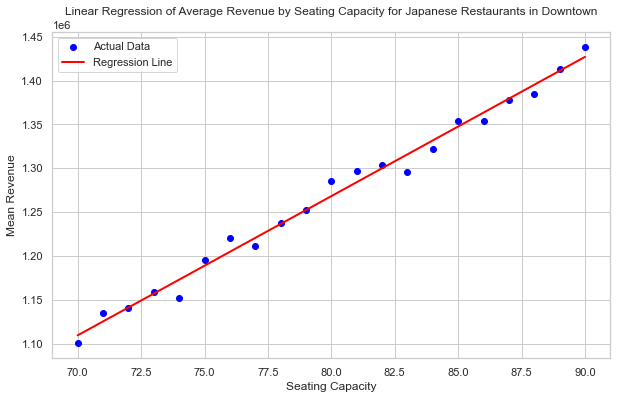

In [113]:
Slope = S_xy / S_xx
Intercept = mean_y - Slope*mean_x
print(f"Slope: {Slope}")
print(f"Intercept: {Intercept}")

Y_pred = [Slope * xi + Intercept for xi in X]

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression of Average Revenue by Seating Capacity for Japanese Restaurants in Downtown')
plt.xlabel('Seating Capacity')
plt.ylabel('Mean Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
TEST = dowtown_jp_seat_revenue
TEST['Predicted Revenue'] = Slope * TEST['Seating Capacity'] + Intercept
TEST['Error'] = abs(TEST['Mean Revenue'] - TEST['Predicted Revenue'])
TEST['Percentage Error'] = TEST['Error'] / TEST['Mean Revenue'] * 100
TEST.sort_values('Percentage Error', ascending = False)

,Seating Capacity,Mean Revenue,Predicted Revenue,Error,Percentage Error
4,74,1.152597e+06,1.173105e+06,20507.260806,1.779222
13,83,1.296072e+06,1.315857e+06,19784.575045,1.526503
10,80,1.285592e+06,1.268273e+06,17319.032301,1.347164
6,76,1.220667e+06,1.204827e+06,15839.805098,1.297635
11,81,1.297258e+06,1.284134e+06,13124.390504,1.011702
1,71,1.135511e+06,1.125521e+06,9990.933617,0.879862
0,70,1.100440e+06,1.109659e+06,9219.418538,0.837794
7,77,1.211071e+06,1.220689e+06,9618.011723,0.794174
20,90,1.438274e+06,1.426886e+06,11388.132200,0.791791
18,88,1.384550e+06,1.395164e+06,10613.242953,0.766548


In [115]:
estimated_standard_error = np.sqrt(np.sum((TEST['Mean Revenue'] - TEST['Predicted Revenue']) ** 2)/(len(TEST)-2))
print(f"Estimated standard error: {estimated_standard_error}")

avg_error = TEST['Percentage Error'].mean()
print("Average percentage error: ", avg_error)

Estimated standard error: 11105.700161035982
Average percentage error:  0.6861213506894777


In [116]:
predict_revenue = Slope * 120 + Intercept
print("Predicted mean revenue for seating capacity of 120: ", predict_revenue)

Predicted mean revenue for seating capacity of 120:  1902726.7357721673
